<a href="https://colab.research.google.com/github/Omsai-2000/Exploratory-Data-Analysis/blob/main/Handling_missing_values_using_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Missing Values- Feature Engineering

>Lifecycle of a Data Science Projects

1.  Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2.  Feature Engineering---Handling Missing Values

> Why are their Missing values?? Survey--Depression Survey

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

> Data Science Projects---Dataset should be collected from multiple sources

>  What are the different types of Missing Data?

>  Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [ ]:
import pandas as pd

# Importing titanic train dataset

df=pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

# Example for Missing completly at random shown below features like Age, cabin and Embarked.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


> Missing Data Not At Random(MNAR):Systematic missing Values

> There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [ ]:
# Missing data not at random

import numpy as np

df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

df['Cabin_null'].mean()

0.7710437710437711

In [ ]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# All Techniques to handle missing values

1.   Mean,Median and mode replacement
2.   Random sampling imputation
3.   Capturing NAN values with a new feature
4.   End of distribution imputation
5.   Arbitrary imputation
6.   Frequent categories imputation




## **1. Mean/Median imputation**



> Why should we apply the above techniques ?



> Mean/median imputation has assumption that the data is missing completly at random. We solve this by replacing NAN values with most frequent occurence of the variables.





In [ ]:
df=pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# percentage of missing values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df,variable,median):
  df[variable+"_median"]= df[variable].fillna(median)

In [ ]:
median=df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


#### Observation: Their is no much difference in std deviation when missing values filled with median

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

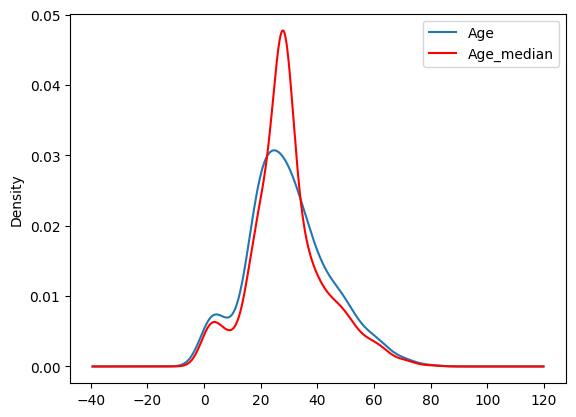

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

## **Advantages and disadvantages of mean/median imputation**

>  **Advantages**

1.   Easy to implement(Robust to outliers)
2.   Faster way to obtain the complete dataset

> **Disdavantages**



1.   Change or distortion in original variance
2.   Impacts correlation




# **2. Random sample imputation**

> It consists of taking random observations from the dataset and we can use this observations to replace NAN values.

> **When it should be used ?**

> It assumes that data is missing completely at random.

In [ ]:
df=pd.read_csv("train.csv", usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
# percentage of null values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
def impute_nan(df,variable,median):
  df[variable+"_median"]= df[variable].fillna(median)
  df[variable+"_random"]= df[variable]
  # It will have the random samples to fill NAN values
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

  # pandas need to have same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median=df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


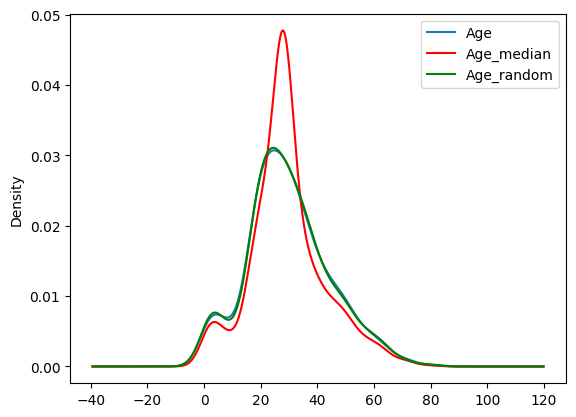

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

> **Adavanatges**


1.   Easy to implent
2.   Their is less distortion in variance

> **Disadvantages**


1.   In every situation randomness won't work



In [ ]:
df=pd.read_csv('train.csv',usecols=(['Age','Fare','Survived']))
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:

import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


> **Advantages**



1.   Easy to implent
2.   Captures the importance of missing values

> Disadvantages

1.  Creating additional featues(Curse of dimentionality)



# **3. End of Distribution Imputation**
> It is used to replace missing data with values that are at the tails of the distribution of the variable.

In [ ]:
df=pd.read_csv('train.csv',usecols=(['Age','Fare','Survived']))
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

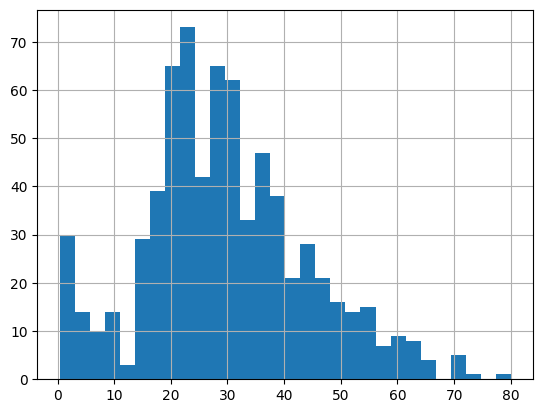

In [ ]:
df.Age.hist(bins=30)

In [ ]:
# Taking values from end/afer of 3rd standard deviation

extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

<Axes: xlabel='Age'>

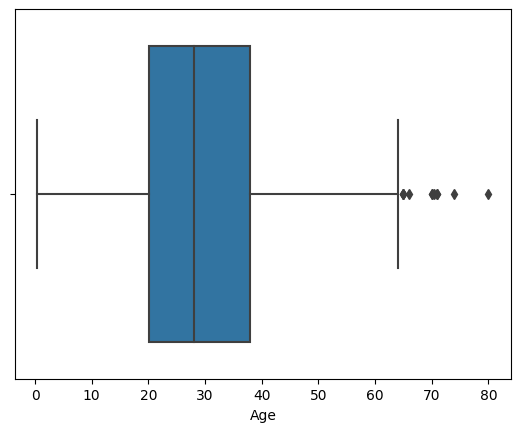

In [ ]:
import seaborn as sns
sns.boxplot(x='Age',data=df)

In [ ]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_distribution"]= df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute_nan(df,"Age",df.Age.median(),extreme)
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

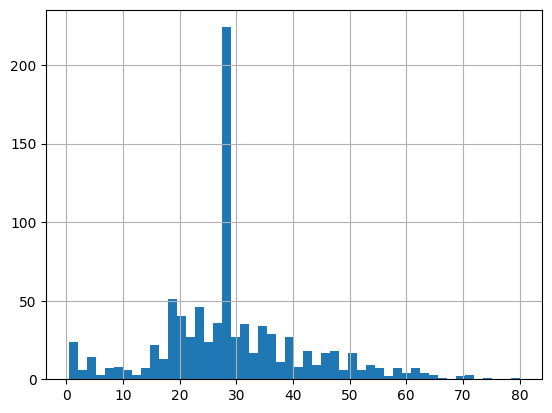

In [ ]:
df['Age'].hist(bins=50)

<Axes: >

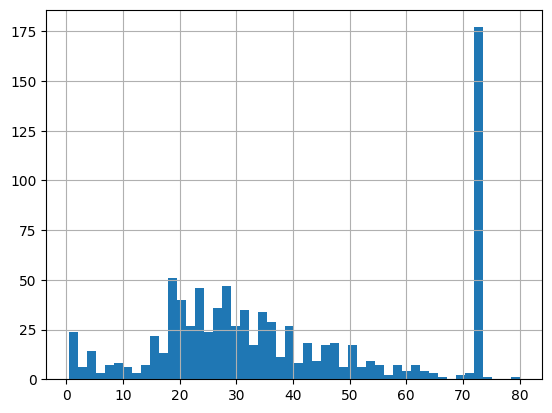

In [ ]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

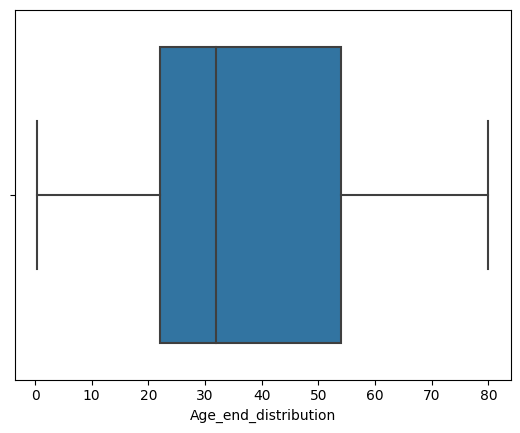

In [ ]:
sns.boxplot(x='Age_end_distribution',data=df)

# **Advantages**:
· Easy to implement

· Fast way of obtaining complete datasets

· Can be integrated into production (during model deployment)

· Captures the importance of “missingness” if there is one

## **Disadvantages**:
· Distortion of the original variable distribution

· Distortion of the original variance

· Distortion of the covariance with the remaining variables of the dataset

· This technique may mask true outliers in the distribution


# **4. Arbitrary Imputation**

> It consists of replacing NAN by an arbitrary value.
> This technique is derived from kaggle competition.
> Arbitrary means random choice or personal choice without any reason.

In [ ]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,variable):
  df[variable+"_zero"]= df[variable].fillna(0)
  df[variable+"_Hundred"]= df[variable].fillna(100)
#This technique is not much useful

In [ ]:
impute_nan(df,"Age")

In [ ]:
df.head()

,Survived,Age,Fare,Age_zero,Age_Hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<Axes: >

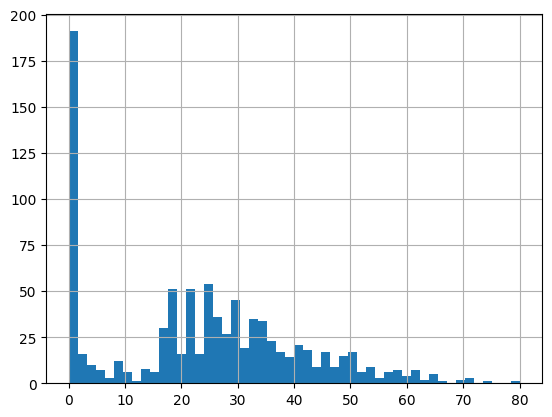

In [ ]:
df['Age_zero'].hist(bins=50)

<Axes: >

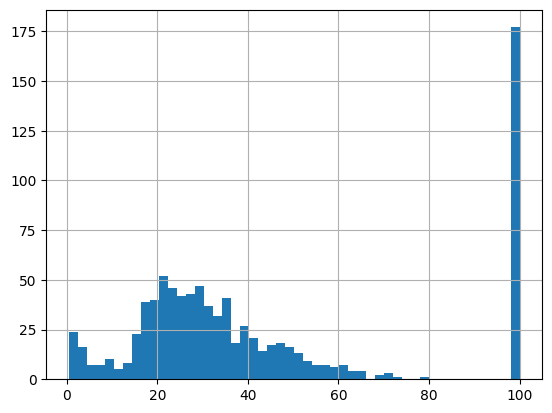

In [ ]:
df['Age_Hundred'].hist(bins=50)

**Advantages**
1. Easy to implement
2. Captures the importance of missingess if there is one
**Disadvantages**
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use

# Handling Categorical values

### 1.Frequent category imputation

In [ ]:
# Importing advance house price pridiction dataset

df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<Axes: xlabel='BsmtQual'>

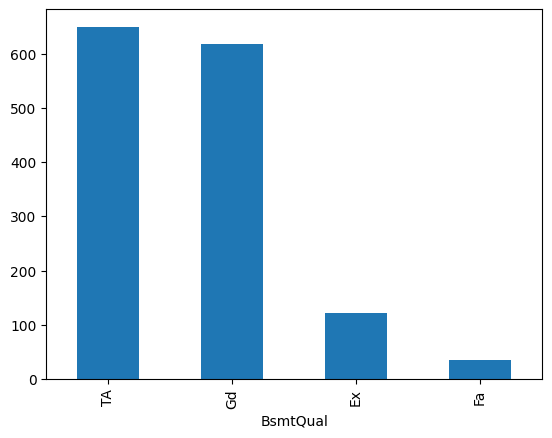

In [ ]:
# compute the frequency with every feature

df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: >

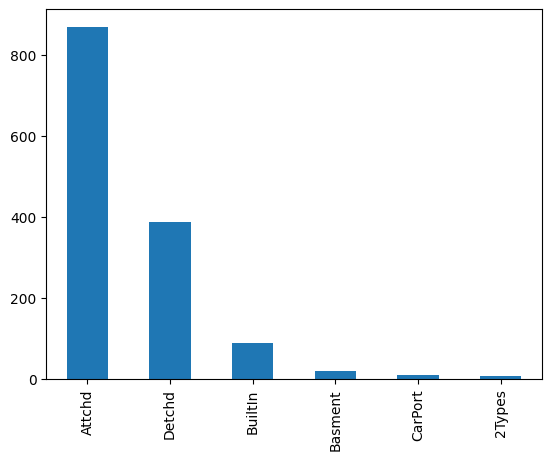

In [ ]:
df['GarageType'].value_counts().plot.bar()

<Axes: >

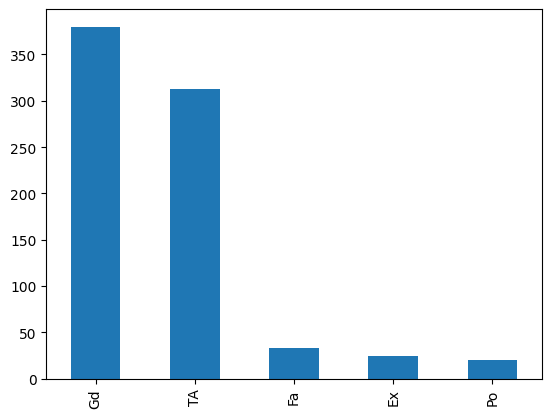

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
df['GarageType'].value_counts().index[0]
 # Also we can use this df['GarageType'].mode()[0]

'Attchd'

In [ ]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].value_counts().index[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
  impute_nan(df,feature)

In [ ]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

**Advantages**
1. Easy to implement
2. Faster way to implement

**Disadvantages**
1. Since we are using more frequent labels, it may use them in over represented way,if there are many NAN's.
2. It distorts the relation of most frequent label.

## 2. Adding a Variable to capture NAN

In [ ]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
freq_value=df['BsmtQual'].mode()[0]
freq_value

'TA'

In [ ]:
df['BsmtQual'].fillna(freq_value,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
import numpy as np
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
freq_value=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(freq_value,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [ ]:
import numpy as np
df['GarageType_Var']=np.where(df['GarageType'].isnull(),1,0)
freq_value=df['GarageType'].mode()[0]
df['GarageType'].fillna(freq_value,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var,GarageType_Var
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


### **Suppose if we have more frequent categories, we just replace NAN with a new category**
> Most used Technique

In [ ]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan(df,variable):
  df[variable+"_var"]=np.where(df[variable].isnull(),"Missing",df[variable])
for feature in ['BsmtQual','GarageType','FireplaceQu']:
  impute_nan(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,GarageType_var,FireplaceQu_var
0,Gd,NaN,Attchd,208500,Gd,Attchd,Missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [ ]:
# so we can drop these below feature
df.drop(['BsmtQual','GarageType','FireplaceQu'],axis=1).head()

,SalePrice,BsmtQual_var,GarageType_var,FireplaceQu_var
0,208500,Gd,Attchd,Missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA


## **One Hot Encoding**

In [ ]:
df=pd.read_csv('train.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [ ]:
df=pd.read_csv('train.csv',usecols=['Embarked'])


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
pd.get_dummies(df,drop_first=False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
# First column 2 and 3 is sufficient to represent NAN values. So we can drop first column
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


**Advantages**:

> It can improve model performance by providing more information to the model about the categorical variable

**Disadvantages**
> If there is more missing Categories. It creates that much new features. Suppose there are 100 missing categories, It will create 100-1 new features.

## One hot encoding with many categories in feature

In [ ]:
# Importing mercedes-benz dataset
df=pd.read_csv('Mercedes.csv',usecols=['X0','X1','X2','X3','X4','X5'])
df.head()

,X0,X1,X2,X3,X4,X5
0,k,v,at,a,d,u
1,k,t,av,e,d,y
2,az,w,n,c,d,x
3,az,t,n,f,d,x
4,az,v,n,f,d,h


In [ ]:
for i in df.columns:
  print(len(df[i].unique()))

47
27
44
7
4
29


In [ ]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [ ]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [ ]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [ ]:
for categories in lst_10:
  df[categories]=np.where(df['X1']==categories,1,0)

In [ ]:
lst_10.append('X1')

In [ ]:
df[lst_10].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v


# **Ordinal Number Encoding**

In [1]:
import datetime

In [2]:
today_date=datetime.datetime.today()

In [3]:
today_date

datetime.datetime(2023, 9, 28, 13, 24, 16, 659717)

In [5]:
today_date-datetime.timedelta(2)
# timedelta used for subtracting or to show difference between dates

datetime.datetime(2023, 9, 26, 13, 24, 16, 659717)

In [9]:
## List comprehension

days=[today_date-datetime.timedelta(x) for x in range(0,15)]
days

[datetime.datetime(2023, 9, 28, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 27, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 26, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 25, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 24, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 23, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 22, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 21, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 20, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 19, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 18, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 17, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 16, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 15, 13, 24, 16, 659717),
 datetime.datetime(2023, 9, 14, 13, 24, 16, 659717)]

In [13]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]
data.head()

,Day
0,2023-09-28 13:24:16.659717
1,2023-09-27 13:24:16.659717
2,2023-09-26 13:24:16.659717
3,2023-09-25 13:24:16.659717
4,2023-09-24 13:24:16.659717


In [28]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2023-09-28 13:24:16.659717,Thursday
1,2023-09-27 13:24:16.659717,Wednesday
2,2023-09-26 13:24:16.659717,Tuesday
3,2023-09-25 13:24:16.659717,Monday
4,2023-09-24 13:24:16.659717,Sunday


In [29]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [30]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [31]:
data.head()

,Day,weekday,weekday_ordinal
0,2023-09-28 13:24:16.659717,Thursday,4
1,2023-09-27 13:24:16.659717,Wednesday,3
2,2023-09-26 13:24:16.659717,Tuesday,2
3,2023-09-25 13:24:16.659717,Monday,1
4,2023-09-24 13:24:16.659717,Sunday,7


# **Count or Frequency Encoding**

In [38]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, index_col=None)

In [39]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
columns=[1,3,5,6,7,8,9,13]
train_set=train_set[columns]

In [46]:
train_set.columns=['Employment','Degree','Marrial_status','Designation','Family_job','Race','Gender','Country']

In [47]:
train_set.head()

,Employment,Degree,Marrial_status,Designation,Family_job,Race,Gender,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [49]:
for feature in train_set.columns:
  print(feature,":",len(train_set[feature].unique()),"labels")

Employment : 9 labels
Degree : 16 labels
Marrial_status : 7 labels
Designation : 15 labels
Family_job : 6 labels
Race : 5 labels
Gender : 2 labels
Country : 42 labels


In [53]:
train_set['Country'].value_counts().to_dict()

# So we can replace with United-States with 29170,Mexico with 643 and so on for all categories.
# This above process is called count or frequency encoding.

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [55]:
country_map=train_set['Country'].value_counts().to_dict()
train_set['Country']=train_set['Country'].map(country_map)
train_set.head()

<ipython-input-55-28eeccc810ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


,Employment,Degree,Marrial_status,Designation,Family_job,Race,Gender,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


> **Advantages**

1. Easy to use
2. Not increasing feature space

> Disadvantages

1. It will provide same weight if frequencies are same

# **Target Guided Ordinal Encoding**



1.   Ordering the labels according to the target.
2.   Replace the labels by the joint probability of being 1 or 0.



In [73]:
df=pd.read_csv('train.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [74]:
df['Cabin'].fillna('Missing',inplace=True)

In [75]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [76]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [77]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [78]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [79]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [80]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [84]:
df['cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)

In [85]:
df.head()

,Survived,Cabin,cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# Mean Encoding

In [86]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [88]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [89]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)

In [90]:
df.head()

,Survived,Cabin,cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


## **Probability Ratio Encoding**

1. Probability of survived based on cabin --categorical feature
2. probability of Not survived -- 1-prob(survived)
3. prob(survived)/prob(Not survived)
4. Dictionary to map cabin with probability
5. Replace with the categorical feature

In [109]:
df=pd.read_csv('train.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [110]:
df['Cabin'].fillna("Missing",inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [111]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [112]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [113]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [114]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [115]:
prob_df['Died']=1-prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [116]:
prob_df['probability_ratio']=prob_df['Survived']/prob_df['Died']

In [117]:
prob_df

,Survived,Died,probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [118]:
prob_ordinal=prob_df['probability_ratio'].to_dict()
df['Cabin_encoding']=df['Cabin'].map(prob_ordinal)
df.head()

,Survived,Cabin,Cabin_encoding
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
